# PART I [50%]
## 1.1 Linear Regression



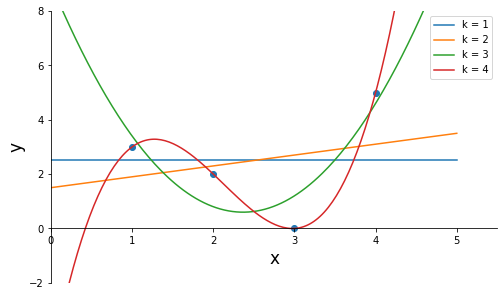

[2.5]
[1.5 0.4]
[ 9.  -7.1  1.5]
[-5.         15.16666667 -8.5         1.33333333]
When k = 1 , MSE =  3.25
When k = 2 , MSE =  3.05
When k = 3 , MSE =  0.8000000000000003
When k = 4 , MSE =  3.607460919575687e-27


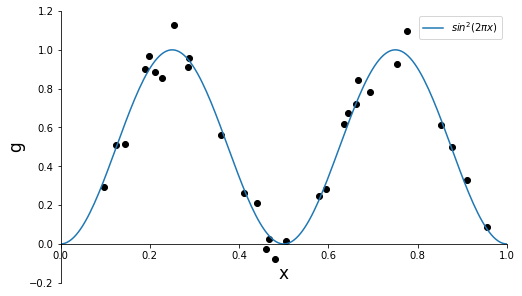

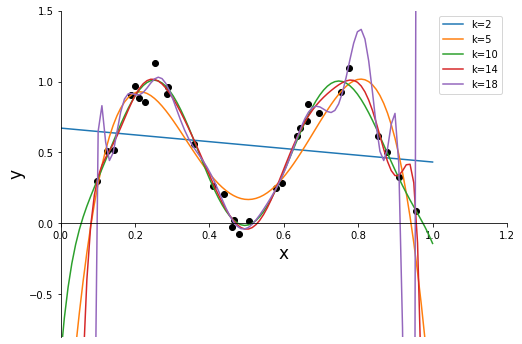

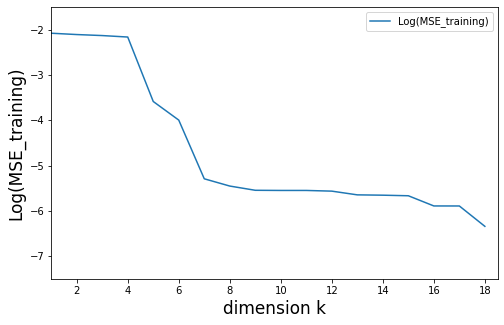

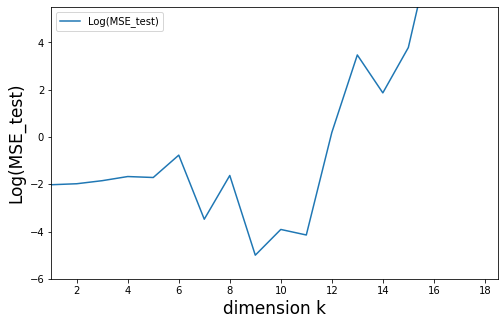

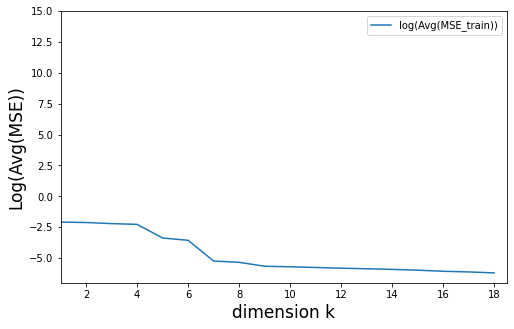

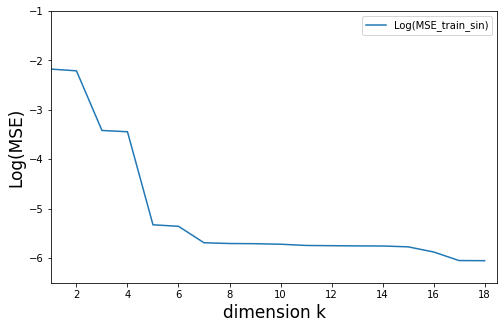

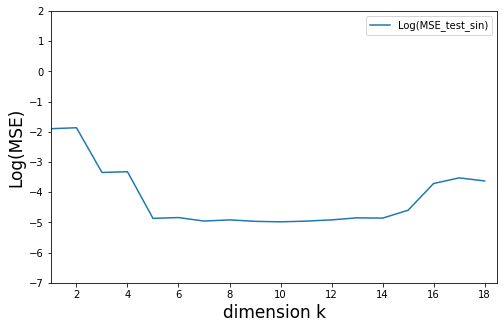

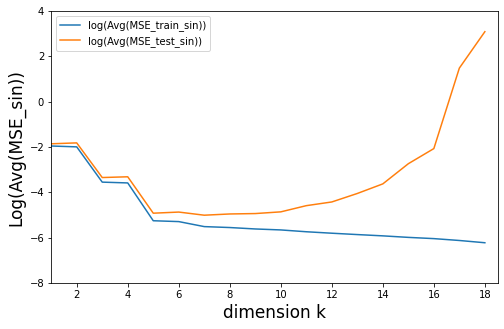

MSE of training set over 20 runs is 83.37525055252755
MSE of test set over 20 runs is 86.6757389475866
Attribute 1
MSE of training set over 20 runs is 70.97051211518507
MSE of test set over 20 runs is 74.1423794216875
 
Attribute 2
MSE of training set over 20 runs is 74.07970670123017
MSE of test set over 20 runs is 72.59065481315899
 
Attribute 3
MSE of training set over 20 runs is 62.048735881502566
MSE of test set over 20 runs is 70.27937832755956
 
Attribute 4
MSE of training set over 20 runs is 80.94494707029278
MSE of test set over 20 runs is 84.15586918770308
 
Attribute 5
MSE of training set over 20 runs is 67.77791140792037
MSE of test set over 20 runs is 71.91413909786014
 
Attribute 6
MSE of training set over 20 runs is 43.06826434561357
MSE of test set over 20 runs is 45.26101812268838
 
Attribute 7
MSE of training set over 20 runs is 69.90104054005818
MSE of test set over 20 runs is 77.8084331276564
 
Attribute 8
MSE of training set over 20 runs is 78.19100687344194
MSE of

KeyboardInterrupt: 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#==================================================
# Q1
#==================================================
# polynomial basis matrix for different basis
def poly_basis_matrix(x, k, basis_sin = False):
     '''
     x is the data set
     k is the dimension of the matrix
     basis_sin   fit basis sin((i+1)kx) or x^i
     '''
    phi = np.zeros((len(x), k))
    for i in range(k):
        if basis_sin == True:
            phi[:,i] = np.sin((i+1) * np.pi * x) # sin((i+1)*pi*x)
        else:
            phi[:,i] = x**i # x^i
    
    return phi


# fit the polynomial and get the weight(coefficient)
def fit_poly(x, y, k, basis_sin = False):
    # x,y   data set
    # k   dimension
    # basis_sin  fit basis sin((i+1)kx) or x^i
    if basis_sin == True:
        X = poly_basis_matrix(x, k, basis_sin = True)
    else:
        X = poly_basis_matrix(x, k, basis_sin = False)
    
    W = np.linalg.pinv(X) @ y # W = (X.T X)^(-1) X.T y
    
    return W


# use the function above to estimate y
def y_estimate(S, W, k):
    # W the weight(coefficient)
    # k dimension
    y_estimate = poly_basis_matrix(S, k) @ W
    
    return y_estimate 


# calculate MSE_train for different basis
def MSE(x,y,k,basis_sin = False):
    # x,y given data
    # k dimension
    # basis_sin  fit basis sin((i+1)kx) or x^i
    if basis_sin == True:
        W = fit_poly(x, y, k, basis_sin = True)
        phi = poly_basis_matrix(x, k, basis_sin = True)
    else:
        W = fit_poly(x, y, k, basis_sin = False)
        phi = poly_basis_matrix(x, k, basis_sin = False)

    sse = np.sum((phi@W - y)**2)
    mse = sse / x.shape[0]
    
    return mse


# calculate MSE_test for different basis
def MSE_test(x_test,y_test,x_data,y_data,k, basis_sin = False):
    # x_test,y_test,x_data,y_data  given training or test data
    # k dimension
    # basis_sin  fit basis sin((i+1)kx) or x^i
    if basis_sin == True:
        W = fit_poly(x_data, y_data, k, basis_sin = True)
        X_test = poly_basis_matrix(x_test, k, basis_sin = True)
    else:
        W = fit_poly(x_data, y_data, k,basis_sin = False)
        X_test = poly_basis_matrix(x_test, k, basis_sin = False)

    sse_test = np.sum((X_test@W - y_test)**2) 
    mse_test = sse_test / x_test.shape[0]
    
    return mse_test


# generate g(x) = sin(2pix)^2
def g(x):
    return (np.sin(2 * np.pi * x)) ** 2
    
    
# generate g(x)+ normal noise       
def g_sigma(x, var):
    eps = np.random.normal(0,var,len(x))
    return g(x) + eps


In [ ]:
#==================================================
# 1(a) plot curves for different dimension
# data set
x = np.array([1, 2, 3, 4])
y = np.array([3, 2, 0, 5])

# dimension list
dim = range(1,5)
S = np.linspace(0,5,200)

plt.figure(figsize = (8,5))
plt.scatter(x, y)

for k in dim:
    W = fit_poly(x, y, k)
    Y = y_estimate(S, W, k)
    plt.plot(S, Y, label= 'k = ' + str(k))  # plot the fitted curves
    
ax=plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
plt.xlim(0, 5.5)
plt.ylim(-2, 8)
plt.legend()
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.savefig('1(a).png', bbox_inches = 'tight')
plt.show()

#==================================================
# 1(b) weights for each polynomial
for k in dim:
    print(fit_poly(x, y, k, basis_sin = False))

#==================================================
# 1(c) # MSE for each curve
for k in dim:
    mse = MSE(x,y,k)
    print('When k =', k , ', MSE = ', mse)





In [ ]:

#==================================================
# Q2
#==================================================
# 2(a)(i)
n = 30
var = 0.07
x = np.array(np.linspace(0, 1, 200))
g_x = g(x) # function without noise

# generate data set
x_data = np.random.uniform(0, 1, n) 
g_data = g_sigma(x_data, var)  

plt.figure(figsize = (8, 5))
plt.scatter(x_data, g_data, c = 'black') # plot scatter
plt.plot(x, g_x, label='$sin^2(2 \pi x)$') # plot curve
ax = plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
plt.legend()
plt.xlim(0, 1)
plt.ylim(-0.2, 1.2)
plt.xlabel('x', fontsize=17)
plt.ylabel('g', fontsize=17)
plt.savefig('2(a)(i).png', bbox_inches = 'tight')
plt.show()


#==================================================
# 2(a)(ii)
plt.figure(figsize = (8,6))
plt.scatter(x_data, g_data, c = 'black')
dim = [2, 5, 10, 14, 18]
S = np.linspace(0,1,100)

for k in dim:
    W = fit_poly(x_data, g_data, k)
    Y = y_estimate(S, W, k)
    plt.plot(S, Y, label="k="+str(k)) 
  

ax=plt.gca()
ax.spines['top'].set_color('none')
ax.spines['bottom'].set_position('zero')
ax.spines['right'].set_color('none')
plt.legend()
plt.xlim(0,1.2)
plt.ylim(-0.8,1.5)
plt.xlabel('x', fontsize=17)
plt.ylabel('y', fontsize=17)
plt.savefig('2(a)(ii).png', bbox_inches = 'tight')

#==================================================
# 2(b)
dim = range(1,19) # dimension list
log_MSE_train = []

for k in dim:
    mse = MSE(x_data,g_data,k)  # MSE on training set
    log_MSE_train.append(np.log(mse)) # log(MSE)

plt.figure(figsize = (8,5))    
plt.plot(dim,log_MSE_train,label='Log(MSE_training)')
plt.legend()
plt.xlim(1, 18.5)
plt.ylim(-7.5, -1.5)
plt.xlabel('dimension k', fontsize=17)
plt.ylabel('Log(MSE_training)', fontsize=17)
plt.savefig('2(b).png', bbox_inches = 'tight')
plt.show()

#==================================================
# 2(c)
n = 1000
dim = range(1,19)

# generate test data set
x_test = np.random.uniform(0, 1, n)
g_test = g_sigma(x_test, var)

log_MSE_test = []

for k in dim:
    mse_test = MSE_test(x_test,g_test,x_data,g_data,k) # MSE on test set
    log_MSE_test.append(np.log(mse_test)) # log(MSE)
    
    
plt.figure(figsize = (8,5)) 
plt.plot(dim,log_MSE_test,label='Log(MSE_test)')
plt.legend()
plt.xlim(1, 18.5)
plt.ylim(-6, 5.5)
plt.xlabel('dimension k', fontsize=17)
plt.ylabel('Log(MSE_test)', fontsize=17)
plt.savefig('2(c).png', bbox_inches = 'tight')
plt.show()

#==================================================
# 2(d)
avg_MSE_train = []
avg_MSE_test = []
run = 100  
dim = range(1,19)

# repeat 100 runs to get the avg MSE 
for i in range(run):
    
    n1,n2 = 30,1000
    var = 0.07
    
    # generate data sets for training and test
    x_train = np.random.uniform(0,1,n1)
    y_train = g_sigma(x_train, var)

    x_test = np.random.uniform(0,1,n2)
    y_test = g_sigma(x_test, var)

    
    # for each dimension calculate MSE with basis_sin =false
    MSE_train_k = []
    MSE_test_k = []
    for k in dim:
        mse = MSE(x_train,y_train,k)
        mse_test = MSE_test(x_test,y_test,x_train,y_train,k)
        
        MSE_train_k.append(mse)
        MSE_test_k.append(mse_test)
    
    avg_MSE_train.append(MSE_train_k)
    avg_MSE_test.append(MSE_test_k)
    
avg_MSE_train = np.array(avg_MSE_train).mean(axis=0)
avg_MSE_test = np.array(avg_MSE_test).mean(axis=0)

plt.figure(figsize = (8,5)) 
plt.plot(dim, np.log(avg_MSE_train), label='log(Avg(MSE_train))')
plt.legend()
plt.xlim(1, 18.5)
plt.ylim(-7,15)
plt.xlabel('dimension k', fontsize=17)
plt.ylabel('Log(Avg(MSE))', fontsize=17)
plt.savefig('2(d).png', bbox_inches = 'tight')
plt.show()

#==================================================
# Q3
#==================================================
# 3(b)
x = np.linspace(0,1,100)
g_x = g(x)

n1,n2 = 30,1000
var = 0.07

# generate data sets for training and test
x_train = np.transpose(np.random.uniform(0,1,n1))
y_train = g_sigma(x_train, var)

x_test = np.transpose(np.random.uniform(0,1,n2))
y_test = g_sigma(x_test, var)

# for each dimension calculate MSE with basis_sin = True
MSE_train_sin = []
MSE_test_sin = []

for k in dim:
    mse_sin = MSE(x_train,y_train,k,basis_sin = True)
    mse_test_sin = MSE_test(x_test,y_test,x_train,y_train,k, basis_sin = True)
    MSE_train_sin.append(mse_sin)
    MSE_test_sin.append(mse_test_sin)

plt.figure(figsize = (8,5))    
plt.plot(dim,np.log(MSE_train_sin),label='Log(MSE_train_sin)')
plt.legend()
plt.xlim(1, 18.5)
plt.ylim(-6.5, -1)
plt.xlabel('dimension k', fontsize=17)
plt.ylabel('Log(MSE)', fontsize=17)
plt.savefig('3(b).png', bbox_inches = 'tight')
plt.show()

#==================================================
# 3(c)
plt.figure(figsize = (8,5))    
plt.plot(dim,np.log(MSE_test_sin),label='Log(MSE_test_sin)')
plt.legend()
plt.xlim(1, 18.5)
plt.ylim(-7, 2)
plt.xlabel('dimension k', fontsize=17)
plt.ylabel('Log(MSE)', fontsize=17)
plt.savefig('3(c).png', bbox_inches = 'tight')
plt.show()

#==================================================
# 3(d)
avg_MSE_train_sin = []
avg_MSE_test_sin = []
run = 100
dim = range(1,19)

# repeat 100 runs to get the avg MSE 
for i in range(run):
    
    n1,n2 = 30,1000
    var = 0.07

    # generate data set
    x_train = np.random.uniform(0,1,n1)
    y_train = g_sigma(x_train, var)

    x_test = np.random.uniform(0,1,n2)
    y_test = g_sigma(x_test, var)
    
    # for each dimension calculate MSE with basis_sin = True
    MSE_train_k = []
    MSE_test_k = []
    for k in dim:
        mse = MSE(x_train,y_train,k,basis_sin = True)
        mse_test = MSE_test(x_test,y_test,x_train,y_train,k,basis_sin = True)
        
        MSE_train_k.append(mse)
        MSE_test_k.append(mse_test)
    
    avg_MSE_train_sin.append(MSE_train_k)
    avg_MSE_test_sin.append(MSE_test_k)
    
avg_MSE_train_sin = np.array(avg_MSE_train_sin).mean(axis=0)
avg_MSE_test_sin = np.array(avg_MSE_test_sin).mean(axis=0)

plt.figure(figsize = (8,5)) 
plt.plot(dim, np.log(avg_MSE_train_sin), label='log(Avg(MSE_train_sin))')
plt.plot(dim, np.log(avg_MSE_test_sin), label='log(Avg(MSE_test_sin))')
plt.legend()
plt.xlim(1, 18.5)
plt.ylim(-8,4)
plt.xlabel('dimension k', fontsize=17)
plt.ylabel('Log(Avg(MSE_sin))', fontsize=17)
plt.savefig('3(d).png', bbox_inches = 'tight')
plt.show()



#==================================================
# Q4
#==================================================
Boston_data = pd.read_csv('Boston-filtered.csv')
Boston_data

# split data set for given ratio
def train_test_split(data,test_ratio):
    # data   given dataset
    # test_ratio  1/3
    data = np.array(data)
    index = np.random.permutation(len(data))
    test_size = int(test_ratio * len(data))+1
    train_data, test_data = data[index[test_size:]], data[index[:test_size]] # split
    return train_data, test_data


# calculate MSE
def MSE_matrix(y_hat,y):
    # y_hat  y pred
    # y    y true
    MSE = []
    for i in range(len(y)):
        mse = (y_hat[i]-y[i])**2
        MSE.append(mse) 
    
    return np.sum(MSE)/len(y)


# predict with the mean y-value one training set
def fit_naive_regression(data,test_ratio,run):
    MSE_train =[]
    MSE_test = []
    
    # for each run
    for i in range(run):
        # split into training and test set
        data_train, data_test = train_test_split(data ,test_ratio)
        
        # create vectors of ones with the same length as the training/test set
        one_train = np.mat(np.ones(len(data_train))).T
        one_test = np.mat(np.ones(len(data_test))).T
        y_train = data_train[:,12].T
        y_test = data_test[:,12].T
        
        # weights by linear regression
        w = np.linalg.pinv(one_train) @ y_train
    
        # mse
        mse_train = MSE_matrix(one_train@w,y_train)
        mse_test = MSE_matrix(one_test@w,y_test)  
        
        MSE_train.append(mse_train)
        MSE_test.append(mse_test)
    
    #std
    std_train = np.std(MSE_train)
    std_test = np.std(MSE_test)
       
    avg_MSE_train = np.mean(MSE_train)
    avg_MSE_test = np.mean(MSE_test)
    
    return avg_MSE_train,avg_MSE_test,std_train,std_test


# predict with a single attribute and a bias term
def fit_single_attribute(data,test_ratio,run,i):
    MSE_train =[]
    MSE_test = [] 
    for j in range(run):
            
        data_train, data_test = train_test_split(data ,test_ratio)
        y_train = data_train[:,12].T
        y_test = data_test[:,12].T
            
        train_att = np.mat(data_train[:,i])
        test_att = np.mat(data_test[:,i])
            
        # ones vectors    
        one_train = np.mat(np.ones(len(data_train)))
        one_test = np.mat(np.ones(len(data_test)))
 
        # the single attribute incorporating a bias term(ones)
        train_single = np.concatenate((train_att, one_train),0)
        test_single = np.concatenate((test_att, one_test), 0)

        w = np.linalg.pinv(train_single.T) @ y_train
    
        # mse
        mse_train = MSE_matrix(train_single.T@w.T,y_train)
        mse_test = MSE_matrix(test_single.T@w.T,y_test)  
            
        MSE_train.append(mse_train)
        MSE_test.append(mse_test)
    
    # std
    std_train = np.std(MSE_train)
    std_test = np.std(MSE_test)
            
    avg_MSE_train = np.mean(MSE_train)
    avg_MSE_test = np.mean(MSE_test)        
    
    return avg_MSE_train,avg_MSE_test,std_train,std_test
     
    
# predict with all the attributes
def fit_all_attribute(data,test_ratio,run):
    MSE_train =[]
    MSE_test = []
    
    for i in range(run):
        data_train, data_test = train_test_split(data ,test_ratio)
        y_train = data_train[:,12].T
        y_test = data_test[:,12].T

        train_att = data_train[:,:12]
        test_att = data_test[:,:12]

        # ones vectors    
        one_train = np.mat(np.ones(len(data_train))).T
        one_test = np.mat(np.ones(len(data_test))).T
        
        # all attributes with bias(ones)
        train_all = np.concatenate((train_att,one_train),1)
        test_all = np.concatenate((test_att,one_test), 1)

        w = np.linalg.pinv(train_all) @ y_train

        # mse
        mse_train = MSE_matrix(train_all@w.T,y_train)
        mse_test = MSE_matrix(test_all@w.T,y_test)
            
        MSE_train.append(mse_train)
        MSE_test.append(mse_test)
    
    # std
    std_train = np.std(MSE_train)
    std_test = np.std(MSE_test)
    
    avg_MSE_train = np.mean(MSE_train)
    avg_MSE_test = np.mean(MSE_test)        
    
    
    return avg_MSE_train,avg_MSE_test,std_train,std_test

#==================================================
# 4(a)
run=20
test_ratio = 1/3
avg_MSE_train,avg_MSE_test,std_train,std_test = fit_naive_regression(Boston_data,test_ratio,run)

print('MSE of training set over 20 runs is ' + str(avg_MSE_train))
print('MSE of test set over 20 runs is ' + str(avg_MSE_test))

#print(std_train)
#print(std_test)

#==================================================
# 4(c) 
# for each attribute perform the linear regression over 20 runs
for i in range(12):
    avg_MSE_train,avg_MSE_test,std_train,std_test = fit_single_attribute(Boston_data,test_ratio,run,i)
    print('Attribute '+str(i+1))
    print('MSE of training set over 20 runs is ' + str(avg_MSE_train))
    print('MSE of test set over 20 runs is ' + str(avg_MSE_test))
    print(' ')

    
#==================================================
# 4(d)
avg_MSE_train,avg_MSE_test,std_train,std_test = fit_all_attribute(Boston_data,test_ratio,run)

print('MSE of training set over 20 runs is ' + str(avg_MSE_train))
print('MSE of test set over 20 runs is ' + str(avg_MSE_test))



#==================================================
# Q5
#==================================================
# compute Gaussian kernel
def gauss_kernel(xi,xj,sigma):
    return np.exp(-(np.linalg.norm(xi-xj))**2/(2*sigma**2))


# return the kernel matrix K
def K_Matrix(x,y,sigma):
    K_mat = np.zeros((len(x),len(y)))
    for i in range(len(x)):
        for j in range(len(y)):
            xi=x[i]
            xj=y[j]          
            K_mat[i,j]= gauss_kernel(xi,xj,sigma)
    return K_mat


# construct the K_fold data
def K_fold_data(data_train,K,i):
    x_train = data_train[:, :12]
    y_train = data_train[:,12]
    fold_size= len(x_train)// K
    set_start = i * fold_size # valid set start point
    set_end = (i + 1) * fold_size # valid set end point
    
    # consider if the end point exceed total data
    # connect the other sets
    x_valid = x_train[set_start :min(set_end,len(x_train))]
    y_valid = y_train[set_start :min(set_end,len(x_train))]
    x_train = np.concatenate((x_train[0 : set_start], x_train[min(set_end,len(x_train)) :]))            
    y_train = np.concatenate((y_train[0 : set_start], y_train[min(set_end,len(y_train)) :]))           
       
    return x_train, y_train, x_valid, y_valid


# define the error matrix
def err_matrix(gamma,sigma,K,data_train):
    err_matrix = np.zeros((len(gamma),len(sigma)))
    # for each pair of sigma and gamma, calculater the corresponding error and store in a matrix
    for g in range(len(gamma)):
        for s in range(len(sigma)):
            for i in range(K):
                x_train, y_train, x_valid, y_valid = K_fold_data(data_train,K,i)
                K_mat = K_Matrix(x_train,x_train,sigma[s]) # K
                w = np.linalg.pinv(K_mat + gamma[g] * len(K_mat) * np.eye(len(K_mat))) @ y_train #alpha
                K_val = K_Matrix(x_train,x_valid,sigma[s])  # K(x,x_test)

                error1 = np.dot(w.T,K_val) - y_valid
                valid_MSE = np.dot(error1,error1.T)/len(x_valid) 
                
            err_matrix[g][s] = valid_MSE
           # print('The gamma value is 2^' + str(gamma_index[g]))
           # print('The sigma value is 2^' + str(sigma_index[s]))
           # print('MSE in the validation set is' + str(err_matrix[g][s]))
           # print('')
     
    return  err_matrix/K


# create gamma sigma vectors
gamma = []
sigma = []
gamma_index = []
sigma_index = []
for i in range(-40, -25):
        gamma.append(2**i)
        gamma_index.append(i)

for i in np.arange(7,13.5,0.5):
        sigma.append(2**i)
        sigma_index.append(i)

sigma = np.array(sigma)
gamma = np.array(gamma)


#==================================================
# 5(a)
Boston_data = pd.read_csv('Boston-filtered.csv')
data_train, data_test = train_test_split(Boston_data ,test_ratio = 1/3)
K = 5 
error_mat = err_matrix(gamma,sigma,K,data_train)

# find the minimal entry in the err_matrix and find its i,j
mini = np.min(error_mat)

for i in range(error_mat.shape[0]):
    for j in range(error_mat.shape[1]):
        if error_mat[i,j] == mini:
            best_gamma_power = gamma_index[i]
            best_sigma_power = sigma_index[j]
            print('Minimum mean error is'+ str(np.min(error_mat)))
            print('The best gamma is 2^'+ str((best_gamma_power)))
            print('The best sigma is 2^'+ str((best_sigma_power)))


#==================================================
# 5(b)
# plot 3D cross-validation error
Z = error_mat  # mean over folds of valid error
X, Y = np.meshgrid(sigma_index,gamma_index)
fig = plt.figure(figsize = (20,15))
ax = fig.gca(projection='3d')
ax.set_xlabel('Gamma power i', fontsize=17)
ax.set_ylabel('Sigma power j', fontsize=17)
ax.set_zlabel('Average MSE_validation', fontsize=17)
surface = ax.plot_surface(X, Y, Z, cmap = 'rainbow')
fig.colorbar(surface)
fig.savefig('5(b).png', bbox_inches = 'tight')


#==================================================
# 5(c) 
# fix gamma sigma
gamma_best = 2**(best_gamma_power)
sigma_best = 2**(best_sigma_power)
x_train = data_train[:, :12]
y_train = data_train[:,12]
x_test = data_test[:, :12]
y_test = data_test[:,12]
k_train = K_Matrix(x_train,x_train,sigma_best)
k_test = K_Matrix(x_train,x_test,sigma_best)
w = np.linalg.pinv(k_train + gamma_best * len(k_train) * np.eye(len(k_train))) @ y_train #alpha
error_train = np.dot(w.T,k_train) - y_train
train_MSE = np.dot(error_train,error_train.T)/len(x_train)
    
error_test = np.dot(w.T,k_test) - y_test
test_MSE = np.dot(error_train,error_train.T)/len(x_test)    
    
print('Train MSE = '+str(train_MSE))
print('Test MSE = '+str(test_MSE))


#==================================================
# 5(d) 
# repeat 4(a)(c)(d)
runs = 20
test_ratio = 1/3

avg_MSE_train, avg_MSE_test,std_train,std_test = fit_naive_regression(Boston_data,test_ratio,run)
print('Naive Regression')
print('MSE train = '+str(avg_MSE_train)+' ± '+str(std_train))
print('MSE test = '+str(avg_MSE_test)+' ± '+str(std_test))


print("--------------------------------------")
print("Linear Regression for single attibute")
for i in range(12):
    avg_MSE_train,avg_MSE_test,std_train,std_test = fit_single_attribute(Boston_data,test_ratio,run,i)
    print('Attribute '+str(i+1))
    print('MSE train = '+str(avg_MSE_train)+' ± '+str(std_train))
    print('MSE test = '+str(avg_MSE_test)+' ± '+str(std_test))
    print(' ')
 

print('--------------------------------------')
print('Linear Regression for all attibute')
avg_MSE_train,avg_MSE_test,std_train,std_test = fit_all_attribute(Boston_data,test_ratio,run)
print('MSE train = '+str(avg_MSE_train)+' ± '+str(std_train))
print('MSE test = '+str(avg_MSE_test)+' ± '+str(std_test))



K = 5 
test_ratio = 1/3

Train_MSE = []
Test_MSE = []

# for each run
for i in range(20):
    print('Run '+str(i+1))
    data_train, data_test = train_test_split(Boston_data ,test_ratio = 1/3)
    error_mat = err_matrix(gamma,sigma,K,data_train) # error matrix
    
    # find the minimal
    mini = np.min(error_mat)
    for i in range(error_mat.shape[0]):
        for j in range(error_mat.shape[1]):
            if error_mat[i,j] == mini:
                best_gamma_power = gamma_index[i]
                best_sigma_power = sigma_index[j]
                
    # print the best gamma sigma for each run
    print('The best gamma is 2^'+ str((best_gamma_power)))
    print('The best sigma is 2^'+ str((best_sigma_power)))
    print('')
    
    # repeat 5(a)(c)
    gamma_best = 2**(best_gamma_power)
    sigma_best = 2**(best_sigma_power)
    
    x_train = data_train[:, :12]
    y_train = data_train[:,12]
    x_test = data_test[:, :12]
    y_test = data_test[:,12]
    k_train = K_Matrix(x_train,x_train,sigma_best)
    k_test = K_Matrix(x_train,x_test,sigma_best)
    w = np.linalg.pinv(k_train + gamma_best * len(k_train) * np.eye(len(k_train))) @ y_train
    error_train = np.dot(w.T,k_train) - y_train
    train_MSE = np.dot(error_train,error_train.T)/len(x_train)
    Train_MSE.append(train_MSE)
    
    error_test = np.dot(w.T,k_test) - y_test
    test_MSE = np.dot(error_train,error_train.T)/len(x_test)
    Test_MSE.append(test_MSE)

# std    
std_train = np.std(Train_MSE)
std_test = np.std(Test_MSE)

# avg
avg_MSE_train = np.mean(Train_MSE)
avg_MSE_test = np.mean(Test_MSE) 


print('Kernelised ridge regression')
print('MSE train = '+str(avg_MSE_train)+' ± '+str(std_train))
print('MSE test = '+str(avg_MSE_test)+' ± '+str(std_test))
